<a href="https://colab.research.google.com/github/fimoziq/unecozik/blob/main/BNGO___mo_oving_averages_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from pandas import read_csv
df = read_csv('baka4.csv',parse_dates = True, index_col = 0,delimiter=',',decimal=',')
df.head()

,pr
d,
2021-01-04,7.20
2021-01-05,4.95
2021-01-06,4.77
2021-01-07,5.00
2021-01-08,4.70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2021-01-04 to 2021-10-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pr      192 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [5]:
df_columns, df.columns = df.columns, ('y', )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y
date,
2021-01-04,7.20
2021-01-05,4.95
2021-01-06,4.77
2021-01-07,5.00
2021-01-08,4.70


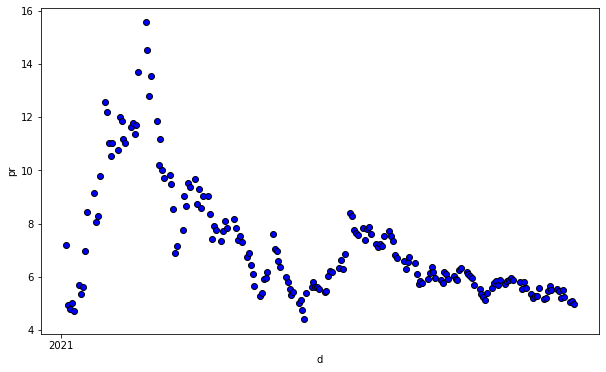

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
    
plt.show()

In [7]:
import numpy as np
df['t'] = np.arange(1, len(df) + 1)
df.head()

,y,t
date,,
2021-01-04,7.20,1
2021-01-05,4.95,2
2021-01-06,4.77,3
2021-01-07,5.00,4
2021-01-08,4.70,5


In [8]:
import numpy as np
coef = np.polyfit(df['t'], df['y'], deg = 1)
coef

array([-0.02458578,  9.56606948])

In [9]:
df['y^'] = coef[0] * df['t'] + coef[1]
df['y^'].head()

date
2021-01-04    9.541484
2021-01-05    9.516898
2021-01-06    9.492312
2021-01-07    9.467726
2021-01-08    9.443141
Name: y^, dtype: float64

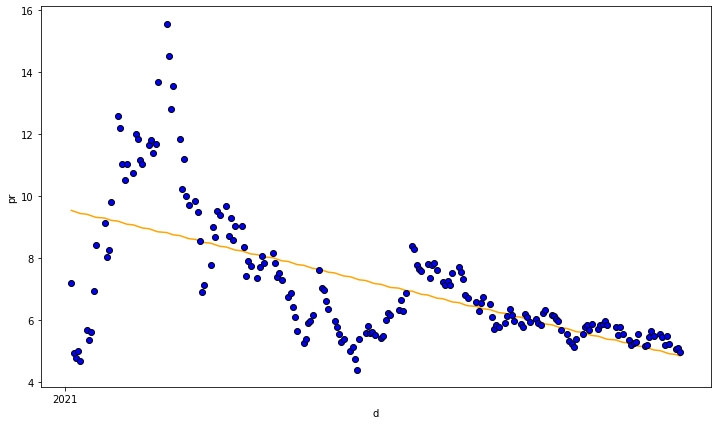

In [10]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df['y^'], color = 'orange')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

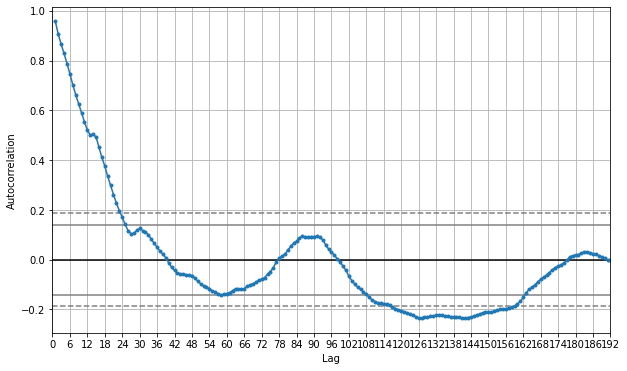

In [11]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize = (10, 6))

autocorrelation_plot(df['y'], ax = ax, marker = '.')
ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.set_xlim(0, 192)

plt.show()

In [14]:
import pandas as pd
s = 12
ses = (df['y']-df['y^'])
ses = np.array([np.mean(ses.iloc[k::s]) for k in range(s)])
ses = pd.DataFrame(ses - np.mean(ses), index = np.arange(1, s + 1))
ses

,0
1,-0.163138
2,-0.256053
3,-0.016467
4,-0.059381
5,-0.018545
6,0.155415
7,-0.011874
8,-0.123538
9,0.176048
10,0.126259


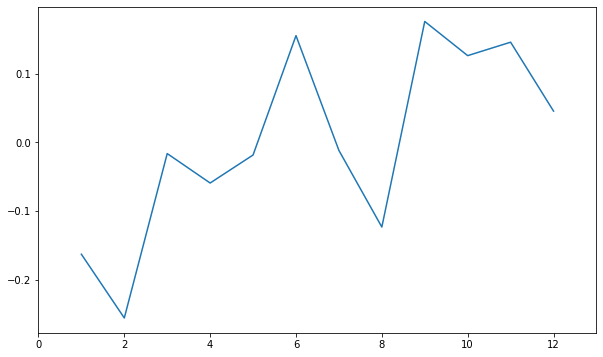

In [15]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_xlim(0, s + 1)
plt.plot(ses)
plt.show()

In [17]:
tmp = pd.concat([ses for _ in range(16)], ignore_index = True)
tmp.index = df.index

In [19]:
df['s'] = tmp
df['y^s'] = df['y^'] + df['s']

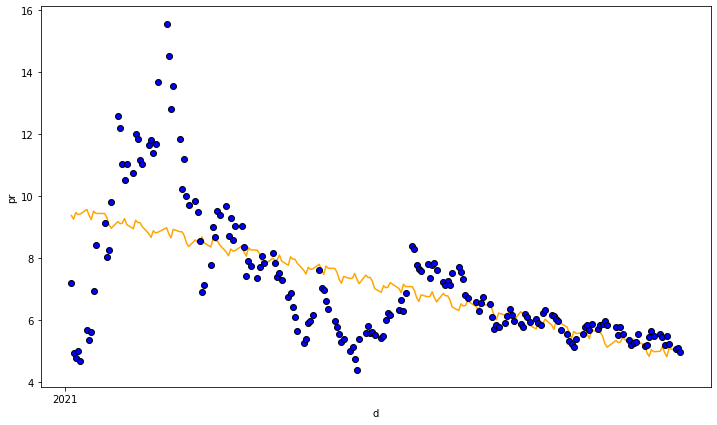

In [20]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df['y^s'], color = 'orange')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

In [21]:
n = len(df)

x = np.arange(48, 60)

df_fv = pd.DataFrame({'y' : coef[0] * x + coef[1] + df['s'].iloc[:12].array}, index = pd.date_range(start = df.index[-1] + np.timedelta64(1, 'M'), 
                                    end   = df.index[-1] + np.timedelta64(13, 'M'), 
                                    freq  = 'MS'))

In [22]:
variance = np.sum(np.power(df['y'] - df['y^s'], 2)) / (n-1)
sigma =np.power(variance,0.5)
sigma

1.6755819473626044

In [23]:
from scipy.stats import t
tstud=t.interval(0.95, len(df)-1)
list(tstud)

[-1.9724619897643145, 1.9724619897643145]

In [24]:
lower=list(tstud)[0]*sigma
lower

-3.3050217019080077

In [25]:
upper=list(tstud)[0]*sigma
upper

-3.3050217019080077

In [26]:
df_fv['y-'] = df_fv['y'] + lower
df_fv['y+'] = df_fv['y'] + upper

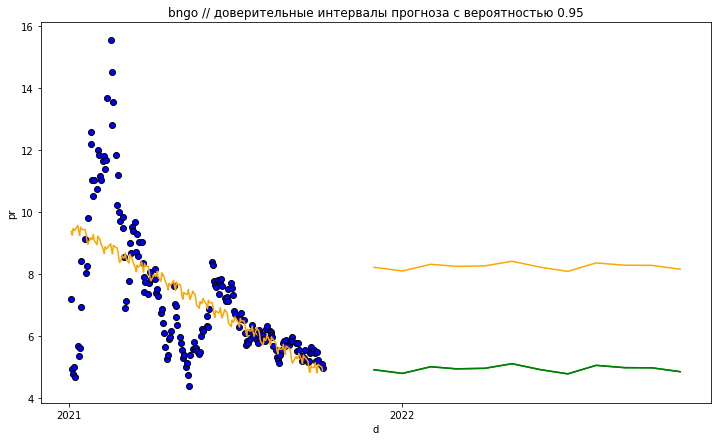

In [29]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.title('bngo // доверительные интервалы прогноза с вероятностью 0.95')
plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df_fv['y-'], color = 'green')
ax.plot(df_fv['y'],  color = 'orange')
ax.plot(df_fv['y+'], color = 'green')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
ax.plot(df['y^s'], color = 'orange')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()